$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\Uv}{\mathbf{U}}
\newcommand{\uv}{\mathbf{u}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\Gv}{\mathbf{G}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\betav_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}$

# Linear Dimensionality Reduction with PCA

## Principal Components Analysis (PCA)

Principal Components Analysis (PCA) is a way to find and use directions in the data space along which data samples vary the most.

Assume samples have $D$ attributes, meaning each sample is
$D$-dimensional.  We want to linearly project each sample to a smaller space,
of dimension $M$ such that as much information about each sample is maintained as possible.  One way to characterize the information is by the variance of the data.  We want the the projected data to have the maximum variance. 

Let's assume each sample $\xv_n$ has zero mean.  For $M=1$, we want
the direction vector (unit length) $\uv_1$ that maximizes the variance
of each projected sample. This variance is
$$
\frac{1}{N} \sum_{n=1}^N (\uv_1^T \xv_n)^2 = \uv_1^T \Sv \uv_1
$$
where
$$
\Sv = \frac{1}{N} \sum_{n=1}^N \xv_n \xv_n^T
$$
To maximize $\uv_1^T \Sv \uv_1$ in a non-trivial way, we constrain
$\uv_1^T \uv_1 = 1$.  This constraint is added with a Lagrange
multipler so that we want $\uv_1$ that maximizes
$$
 \uv_1^T \Sv \uv_1+ \lambda_1(1-\uv_1^T \uv_1)
$$
Setting the derivative of this with respect to $\uv_1$ equal to zero we find
that
$$
\Sv \uv_1 = \lambda_1 \uv_1
$$
so $\uv_1$ is an eigenvector of $\Sv$ and $\lambda_1$ is an eigenvalue
that is the variance of the projected samples.

Additional directions, all orthogonal to each other, are found by the
eigendecomposition of $\Sv$, or, equivalently, the singular value
decomposition of data sample matrix $\Xv$ with mean zero.  
$$
\Uv \Sigmav \Vv^T = \Xv
$$
The columns of $\Vv$ are the eigenvectors of $\Sv$ and the elements of the
diagonal matrix $\Sigmav$ are the square root of the eigenvalues.

    X = X - np.mean(X,axis=0)
    U,s,V = np.linalg.svd(X)
    V = V.T
    
Then, to project onto the eigenvectors, just

    proj = X @ V

Let's generate some two-dimensional samples from a Normal distribution
with mean [0,4] and covariance matrix 
$\Sigma=\begin{bmatrix} 0.9 & 0.8\\ 0.8 & 0.9 \end{bmatrix}$.  Then we
will calculate the svd of the samples and project the samples to the
two eigenvectors.

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# np.random.multivariate_normal?

In [39]:
n_samples = 200
np.random.multivariate_normal([0, 4], [[0.9, 0.8], [0.8, 0.9]], n_samples).shape

(200, 2)

We can write our own multivariate normal random number generater like this, using the univariate np.random.normal function.

In [40]:
def mv_normal(n, mean, sigma):                                                 
    mean = np.array(mean) # to allow entry of values as simple lists                                                       
    sigma = np.array(sigma)                                                     
    X = np.random.normal(0, 1, n * len(mean)).reshape((n, len(mean)))                
    return np.dot(X, np.linalg.cholesky(sigma)) + mean        

N = 200
data = mv_normal(N, [0, 4], [[0.9, 0.8], [0.8, 0.9]])
data.shape

(200, 2)

In [41]:
means = np.mean(data, axis=0)
datan = data - means

U, S, V = np.linalg.svd(datan)
V = V.T
V.shape

(2, 2)

In [42]:
V

array([[ 0.9697418 , -0.24413282],
       [ 0.24413282,  0.9697418 ]])

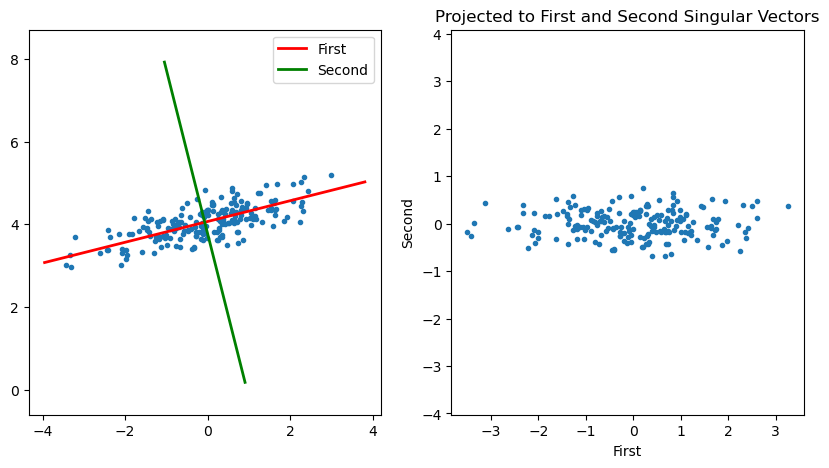

In [43]:
def drawline(v, means, length, color, label):
  p1 = means - v * length / 2
  p2 = means + v * length / 2
  plt.plot([p1[0], p2[0]], [p1[1], p2[1]], label=label, color=color, linewidth=2)


def plot_original_and_transformed(data, V):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(data[:, 0], data[: ,1], '.')
    means = np.mean(data, axis=0)
    drawline(V[:, 0], means, 8, "red", "First")
    drawline(V[:, 1], means, 8, "green", "Second")
    leg = plt.legend()
    plt.axis('equal')
    plt.gca().set_aspect('equal')


    plt.subplot(1, 2, 2)    
    proj = (data - means) @ V
    plt.plot(proj[:, 0], proj[:, 1], '.')
    plt.axis('equal')
    plt.gca().set_aspect('equal')
    plt.xlabel("First")
    plt.ylabel("Second")
    plt.title("Projected to First and Second Singular Vectors");
    
plot_original_and_transformed(data, V)

Now, if we have two classes of data, we might be able to classify the
data well with just the projection onto just one eigenvector.    Could
be either eigenvector.

First, with second class having mean [-5,3] and 
$\Sigma=\begin{bmatrix} 0.9 & 0.8\\ -0.8 & 0.9 \end{bmatrix}$.

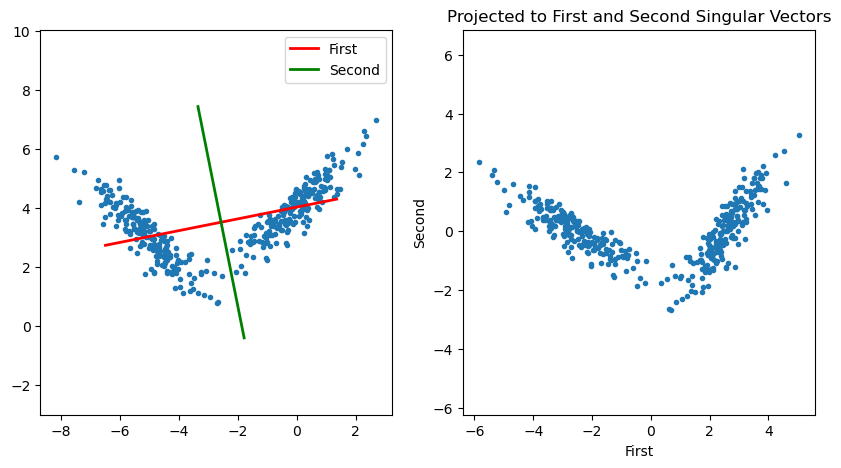

In [44]:
N = 200
data1 = np.random.multivariate_normal([0, 4], [[0.9 ,0.8], [0.8, 0.9]], N)
data2 = np.random.multivariate_normal([-5, 3], [[0.9, -0.8], [-0.8, 0.9]], N)
data = np.vstack((data1, data2))

means = np.mean(data, axis=0)

U, S ,V = np.linalg.svd(data - means)
V = V.T

plot_original_and_transformed(data, V)

And again, with first class 
$\Sigma=\begin{bmatrix} 0.9 & 0.2\\ 0.2 & 20 \end{bmatrix}$
and second class having
$\Sigma=\begin{bmatrix} 0.9 & 0.2\\ -0.2 & 20 \end{bmatrix}$.

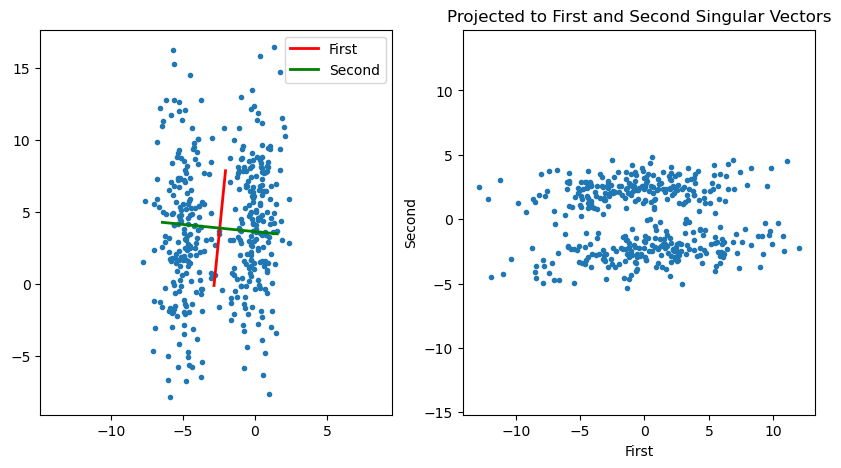

In [45]:
N = 200
data1 = np.random.multivariate_normal([0, 4], [[0.9 ,0.2], [0.2, 20]], N)
data2 = np.random.multivariate_normal([-5, 3], [[0.9, -0.2], [-0.2, 20]], N)
data = np.vstack((data1, data2))

means = np.mean(data, axis=0)

U, S ,V = np.linalg.svd(data - means)
V = V.T

plot_original_and_transformed(data, V)

# Examples of Linear Dimensionality Reduction

## Principal Components Analysis (PCA)

Let's apply PCA to the MNIST digits.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
import pickle

In [47]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1].reshape((-1,1))

Xtest = test_set[0]
Ttest = test_set[1].reshape((-1,1))

Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((50000, 784), (50000, 1), (10000, 784), (10000, 1))

In [48]:
Xmean = Xtrain.mean(axis=0)

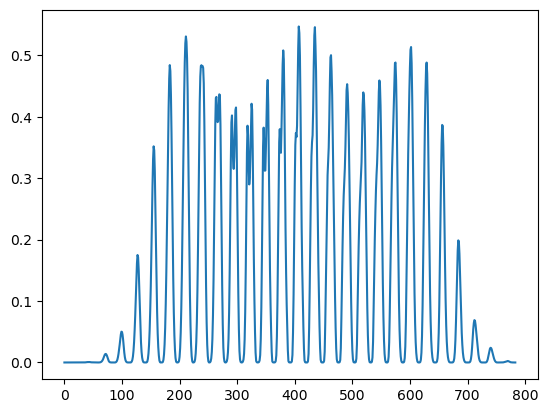

In [49]:
plt.plot(Xmean);

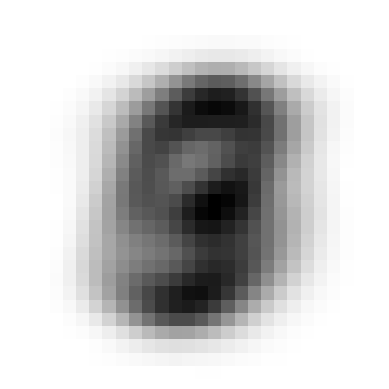

In [50]:
plt.imshow(-Xmean.reshape((28, 28)), cmap='gray')
plt.axis('off');

In [51]:
Xmean.shape

(784,)

In [52]:
U, S, V = np.linalg.svd(Xtrain - Xmean, full_matrices=False)
V = V.T

In [53]:
U.shape, S.shape, V.shape

((50000, 784), (784,), (784, 784))

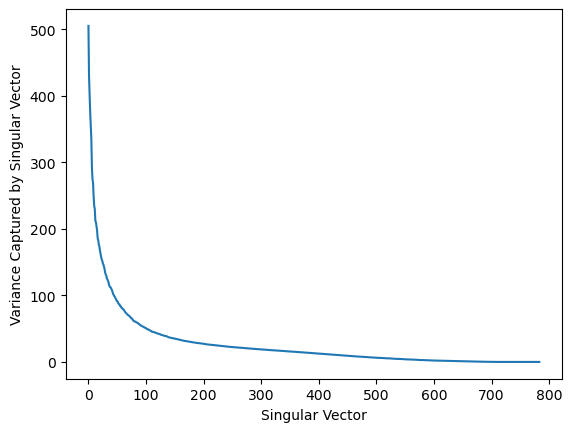

In [54]:
plt.plot(S)
plt.xlabel('Singular Vector')
plt.ylabel('Variance Captured by Singular Vector');

What do the first 16 singular vectors look like?

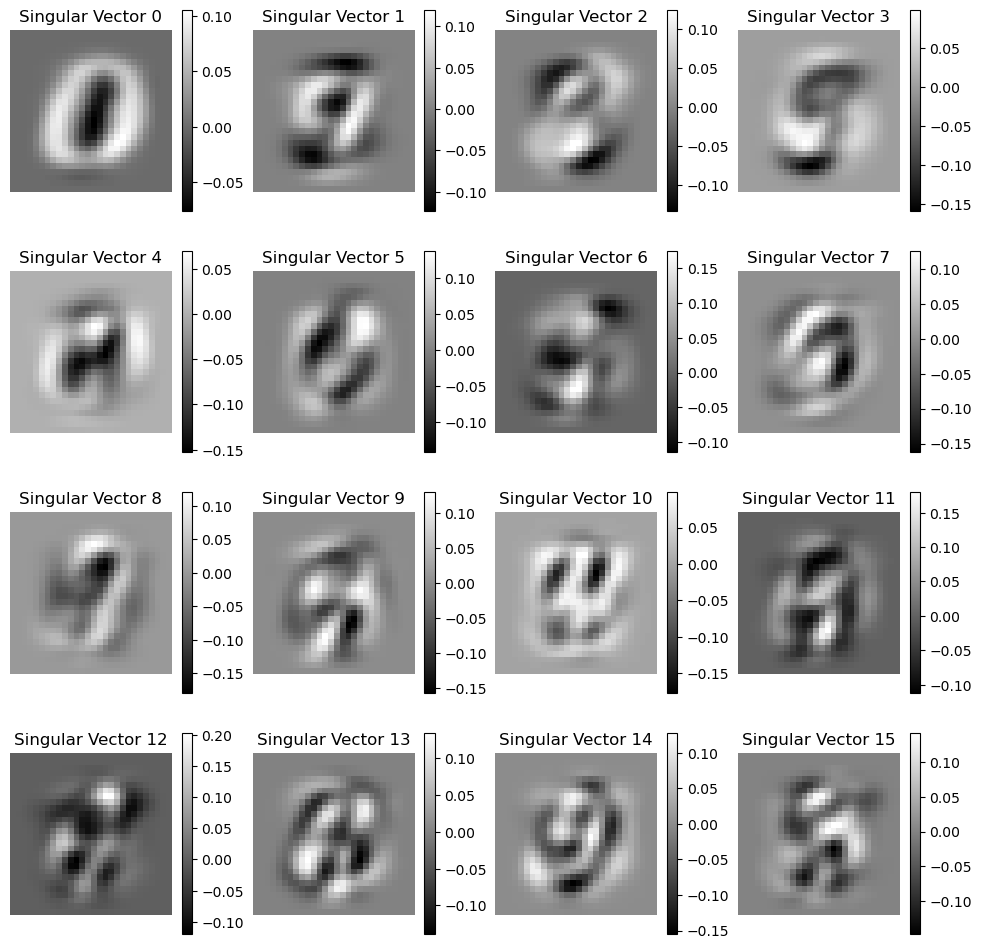

In [55]:
plt.figure(figsize=(12, 12))
for vi in range(16):
    plt.subplot(4, 4, vi + 1)
    plt.imshow(V[:, vi].reshape((28, 28)), cmap='gray')
    plt.title(f'Singular Vector {vi}')
    plt.axis('off')
    plt.colorbar()

How about the last 16?

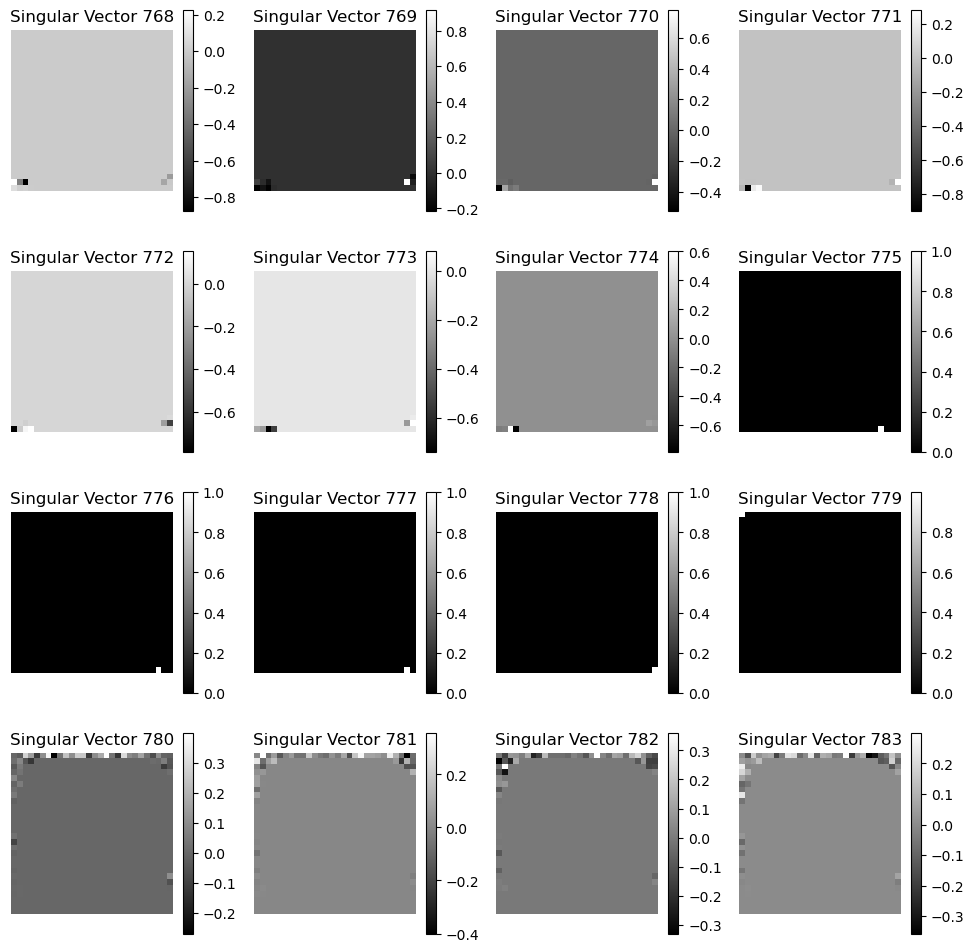

In [56]:
plt.figure(figsize=(12, 12))
for vi in range(16):
    plt.subplot(4, 4, vi + 1)
    plt.imshow(V[:, 784 - 16 + vi].reshape((28, 28)), cmap='gray')
    plt.title(f'Singular Vector {784 - 16 + vi}')
    plt.axis('off')
    plt.colorbar()

In [57]:
X = Xtrain[:40, :]
X = X - Xmean
X.shape

(40, 784)

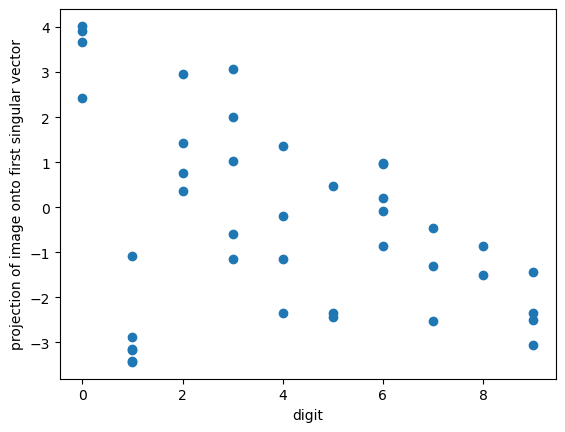

In [58]:
p = (Xtrain[:40, :] - Xmean) @ V[:, 0:1]
plt.plot(Ttrain[:40,0], p, 'o')
plt.xlabel('digit')
plt.ylabel('projection of image onto first singular vector');

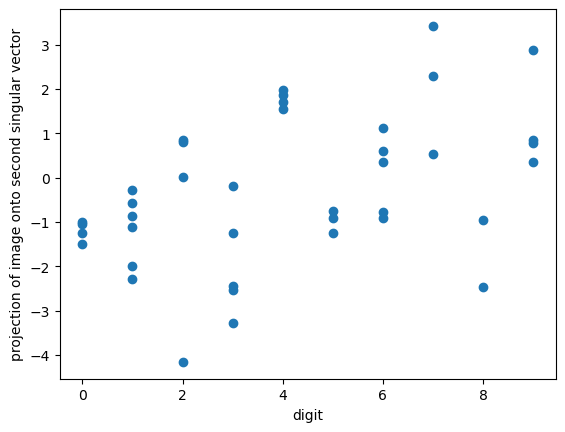

In [59]:
p = (Xtrain[:40, :] - Xmean) @ V[:, 1:2]
plt.plot(Ttrain[:40,0], p, 'o')
plt.xlabel('digit')
plt.ylabel('projection of image onto second singular vector');

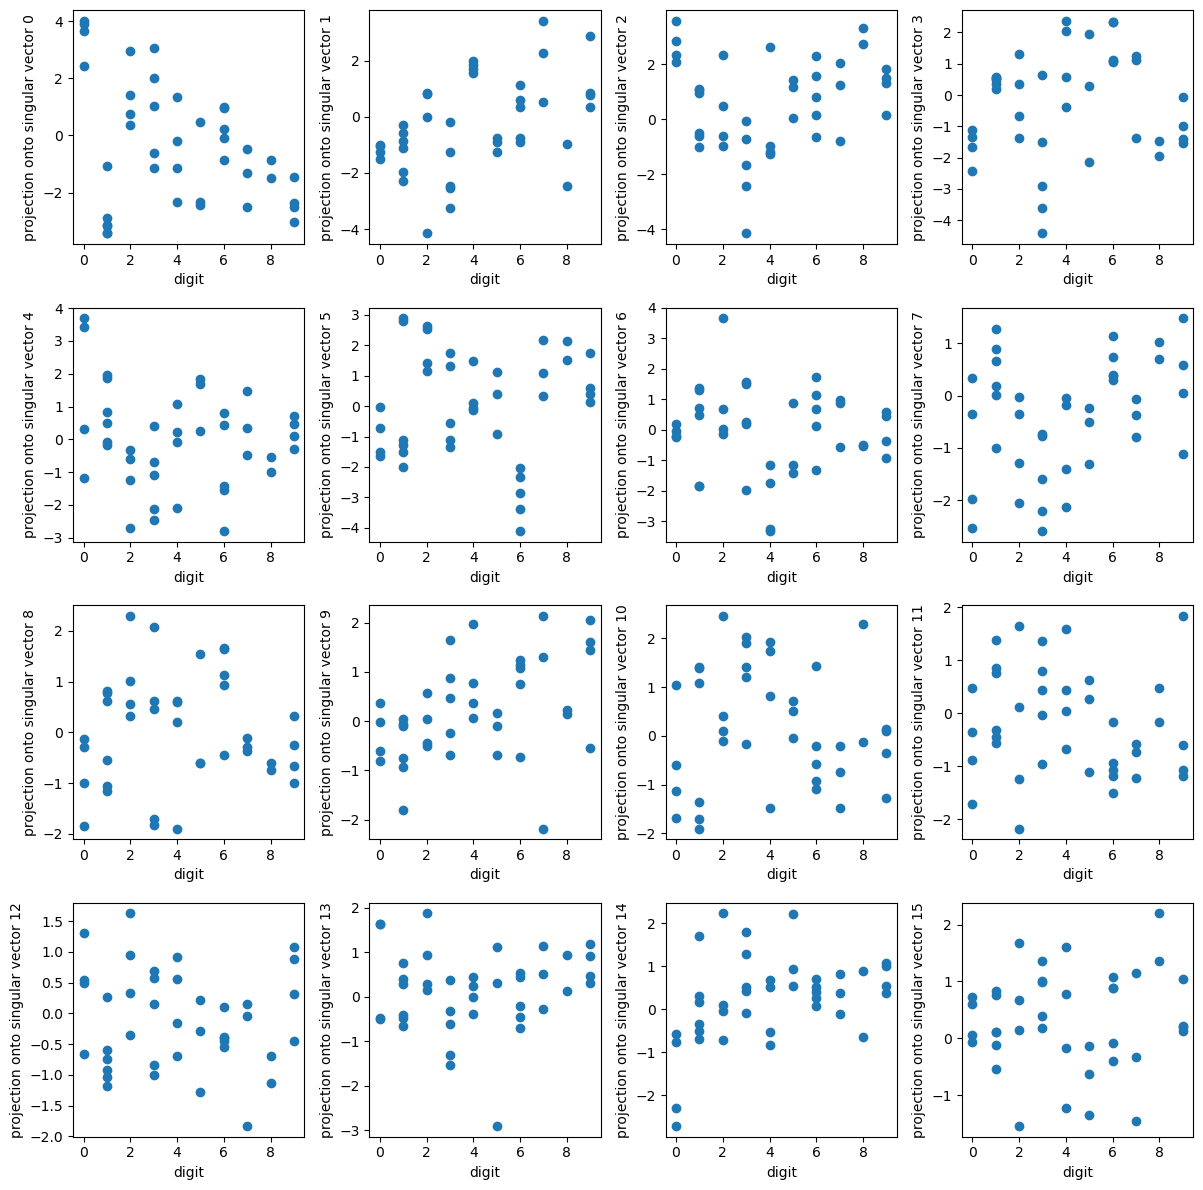

In [60]:
plt.figure(figsize=(12, 12))
p = (Xtrain[:40, :] - Xmean) @ V[:, :16]
for vi in range(16):
    plt.subplot(4, 4, vi + 1)
    plt.plot(Ttrain[:40, 0], p[:, vi], 'o')
    plt.xlabel('digit')
    plt.ylabel(f'projection onto singular vector {vi:d}')
plt.tight_layout()

Here is how we can check that two singular vectors are indeed orthogonal.  Their dot product must be 0.

In [61]:
V[:, 2:3].T @ V[:, 1:2]

array([[0.]], dtype=float32)

Let's take a look at an image, and its reconstruction using its projection on the first singular vector

(-0.5, 27.5, 27.5, -0.5)

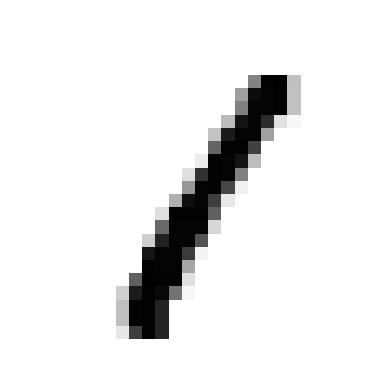

In [62]:
plt.imshow(-Xtrain[3, :].reshape((28, 28)), cmap='gray')
plt.axis('off')

In [63]:
p_all = (Xtrain[3:4, :] - Xmean) @ V  # projecting to all

In [64]:
p_all.shape

(1, 784)

In [65]:
(V[:, 0:1] @ p_all[:, 0:1]).shape

(784, 1)

In [66]:
recon = (V[:, 0:1] @ p_all[:, 0:1]).T + Xmean

In [67]:
recon.shape

(1, 784)

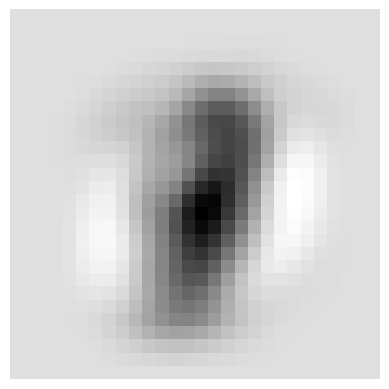

In [68]:
plt.imshow(-recon.reshape((28,28)), cmap='gray')
plt.axis('off');

What if we use the first two singular vectors, or the first three? How many dimensions do we need to get a reconstruction that is close to the original image?

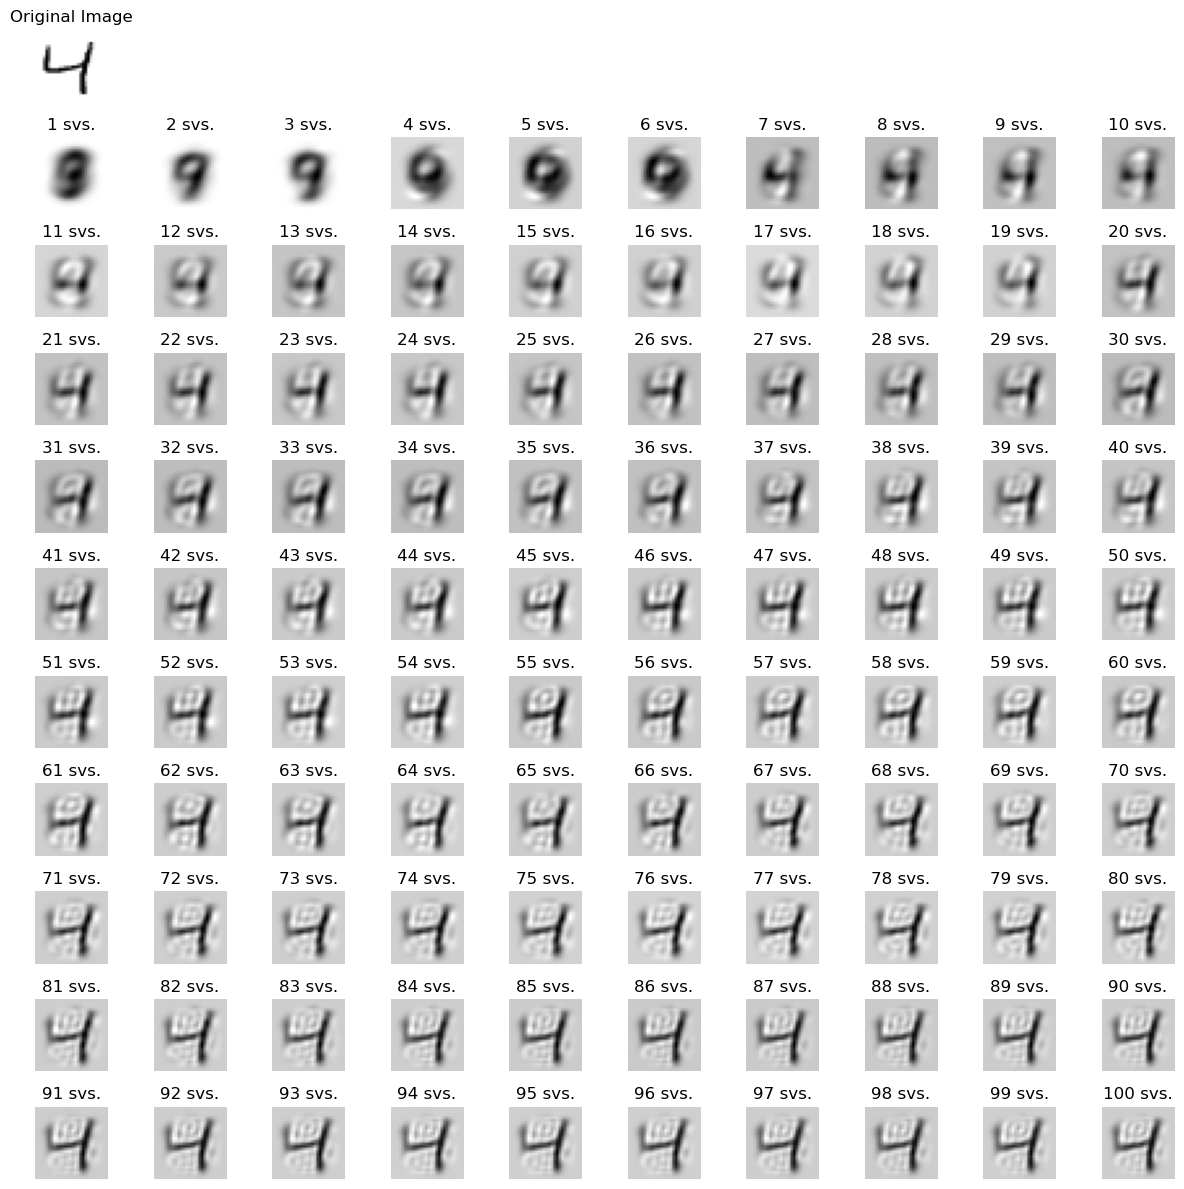

In [69]:
plt.figure(figsize=(12, 12))

X = Xtrain[2, :]

proj = (X - Xmean) @ V
proj = proj.reshape(1, 784)

plt.subplot(11, 10, 1)
plt.imshow(-X.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.title('Original Image')

ploti = 10
for n_sv in range(1, 101):
    ploti += 1
    plt.subplot(11, 10, ploti)
    
     # Here we do the reconstruction
    recon = (V[:, 0:n_sv] @ proj[:, 0:n_sv].T).T + Xmean 
    
    plt.imshow(-recon.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'{n_sv} svs.')
    
plt.tight_layout()

In [70]:
V.shape

(784, 784)

What do the last singular vectors look like?

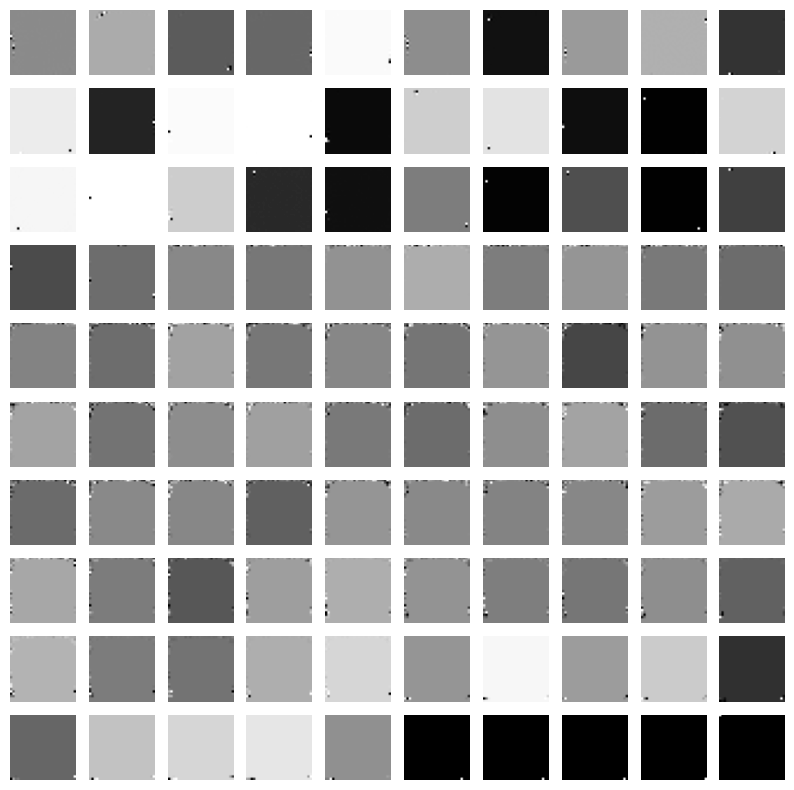

In [71]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(V[:, 680+i].reshape((28,28)), cmap='gray')
    plt.axis('off')

In [92]:
import neuralnetworksA4 as nn

nnet = nn.NeuralNetworkClassifier(784, [100], 10)
nnet.train(Xtrain, Ttrain, 50, method='scg', verbose=True)

SCG: Iteration 5 Likelihood=0.94190
SCG: Iteration 10 Likelihood=0.96789
SCG: Iteration 15 Likelihood=0.97409
SCG: Iteration 20 Likelihood=0.97883
SCG: Iteration 25 Likelihood=0.98339
SCG: Iteration 30 Likelihood=0.98797
SCG: Iteration 35 Likelihood=0.99084
SCG: Iteration 40 Likelihood=0.99387
SCG: Iteration 45 Likelihood=0.99665
SCG: Iteration 50 Likelihood=0.99843


NeuralNetworkClassifier(784, [100], 10)

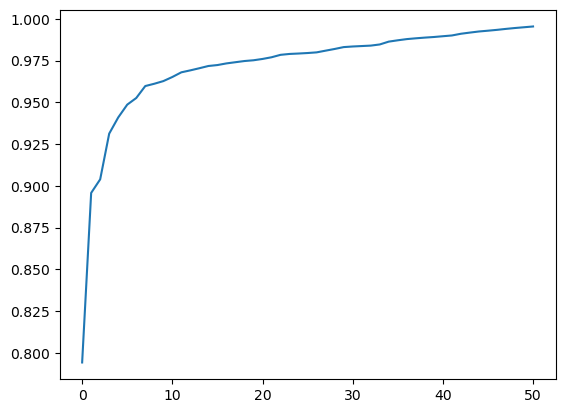

In [87]:
plt.plot(nnet.get_performance_trace());

In [88]:
def percent_correct(T, C):
    return np.sum(C == T) / len(T) * 100

def print_percent_correct(nnet, Xtrain, Ttrain, Xtest, Ttest):
    Ctrain, _ = nnet.use(Xtrain)
    Ctest, _ = nnet.use(Xtest)
    Ptrain = np.sum(Ctrain == Ttrain) / len(Ttrain) * 100
    Ptest = np.sum(Ctest == Ttest) / len(Ttest) * 100
    print(f'% Correct: Train {percent_correct(Ttrain, Ctrain):.2f} Test {percent_correct(Ttest, Ctest):.2f}')

In [89]:
print_percent_correct(nnet, Xtrain, Ttrain, Xtest, Ttest)

% Correct: Train 98.92 Test 96.06


Let's try training a neural net that receives just the projections of each image onto the first three singular vectors, so three values for each image, instead of 784!!!

In [93]:
Xmean = Xtrain.mean(0)
Xtrainm = Xtrain - Xmean
Xtestm = Xtest - Xmean

Xtrainm3 = Xtrainm @ V[:, :3]
Xtestm3 = Xtestm @ V[:, :3]

Xtrainm3.shape, Xtestm3.shape

((50000, 3), (10000, 3))

In [94]:
nnet = nn.NeuralNetworkClassifier(3, [100], 10)

nnet.train(Xtrainm3, Ttrain, 50, method='scg', verbose=True)

SCG: Iteration 5 Likelihood=0.87160
SCG: Iteration 10 Likelihood=0.87480
SCG: Iteration 15 Likelihood=0.87775
SCG: Iteration 20 Likelihood=0.88025
SCG: Iteration 25 Likelihood=0.88155
SCG: Iteration 30 Likelihood=0.88258
SCG: Iteration 35 Likelihood=0.88340
SCG: Iteration 40 Likelihood=0.88415
SCG: Iteration 45 Likelihood=0.88476
SCG: Iteration 50 Likelihood=0.88521


NeuralNetworkClassifier(3, [100], 10)

In [95]:
print_percent_correct(nnet, Xtrainm3, Ttrain, Xtestm3, Ttest)

% Correct: Train 50.85 Test 51.94


So, projecting 784 down to 3 dimensions does not do well.  Let's check accuracy for projecting down to dimensions from 1 to 60.

In [103]:
import pandas as pd

results = []
for n_dim in range(1, 60, 2):
    
    Xtrainmn = Xtrainm @ V[:, :n_dim]
    Xtestmn = Xtestm @ V[:, :n_dim]

    nnet = nn.NeuralNetworkClassifier(n_dim, [100], 10)    
    nnet.train(Xtrainmn, Ttrain, 50, method='scg', verbose=False)
    
    Ctrain, _ = nnet.use(Xtrainmn)
    Ctest, _ = nnet.use(Xtestmn)
    result = [n_dim, percent_correct(Ttrain, Ctrain), percent_correct(Ttest, Ctest)]
    print(result)
    results.append(result)

np.save('pca_mnist.npy', np.array(results))

[1, 30.452, 31.41]
[3, 50.794, 52.03]
[5, 74.236, 75.55]
[7, 86.824, 87.37]
[9, 90.794, 90.82000000000001]
[11, 92.916, 92.25]
[13, 95.524, 94.89999999999999]
[15, 95.81, 94.76]
[17, 96.794, 95.54]
[19, 97.508, 95.8]
[21, 97.626, 95.82000000000001]
[23, 98.218, 96.1]
[25, 98.294, 95.92]
[27, 98.576, 96.14]
[29, 98.88, 95.82000000000001]
[31, 99.058, 95.74000000000001]
[33, 99.152, 95.78999999999999]
[35, 99.442, 95.78999999999999]
[37, 99.384, 95.84]
[39, 99.61, 95.78]
[41, 99.586, 95.61]
[43, 99.712, 95.91]
[45, 99.112, 95.82000000000001]
[47, 99.53800000000001, 95.56]
[49, 99.776, 95.98]
[51, 99.51, 96.09]
[53, 98.92, 95.81]
[55, 99.286, 95.43]
[57, 99.648, 95.23]
[59, 99.914, 96.21]


In [102]:
results = np.load('pca_mnist.npy')

pd.DataFrame(results, columns=('N SVs', 'Train % Correct', 'Test % Correct'))

,N SVs,Train % Correct,Test % Correct
0,1.0,30.422,31.34
1,3.0,50.910,52.18
2,5.0,74.232,75.64
3,7.0,87.048,87.50
4,9.0,90.834,90.84
5,11.0,93.436,92.72
6,13.0,95.268,94.45
7,15.0,95.852,94.59
8,17.0,96.684,95.29
9,19.0,97.326,95.96


In [ ]:
results = np.array(results)
plt.plot(results[:, 0], results[:, 1], label='Train % Correct')
plt.plot(results[:, 0], results[:, 2], label='Test % Correct')
plt.legend()
plt.xlabel('Number of PCA Components Used');

## Compare to regular neural net with 20 units in first layer.

In [ ]:
nnet = nn.NeuralNetworkClassifier(784, [20, 100], 10)
# nnet.train(Xtrain, Ttrain, 500, 0.01, method='adam', verbose=True)
nnet.train(Xtrain, Ttrain, 1000, 0.01, method='adam', verbose=True)
nnet

In [ ]:
plt.plot(nnet.error_trace);

In [ ]:
print_percent_correct(nnet, Xtrain, Ttrain, Xtest, Ttest)

The weights in the first layer, of 20 units, can be reshaped into images to see what patterns they detect in the digits.

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(5, 5, i + 1) 
    plt.imshow(nnet.Ws[0][1:, i].reshape((28, 28)), cmap='gray')
    plt.axis('off')

Here are the first 20 singular vectors again.

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.imshow(V[:,i].reshape((28, 28)), cmap='gray')
    plt.axis('off')